 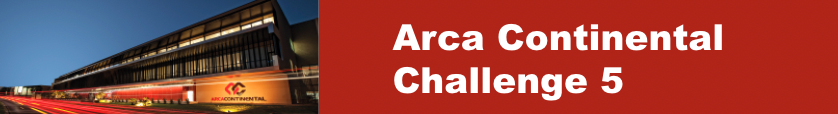

In [11]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


#Canibalization 

It refers to a reduction in sales volume, sales revenue, or market share of one product as a result of the introduction of a new product by the same produce.

##Phase 1:
Understanding the source of big data

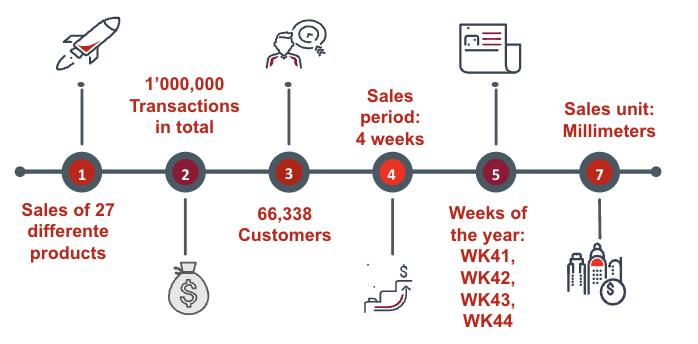

#Phase 2
Understending the methodology and data exploration

**(Poner aquí gráficas Rubén analizando información y manipulación de datos)**

**(Poner aquí precedures carried out fo the development of the prototpye)** 

-Clustering ( y en caso de aplicar, la gráfica)

-PCA Analysis ( y en caso de aplicar, la gráfica)

-Market Basket ( y en caso de aplicar, la gráfica)

-Extreme points method ( y en caso de aplicar, la gráfica)

**Relationship of the data and the problem of the project.**

Challenges faced with the data

**Data Reduction**

Follow the exercise performed above to perform data preparation, selection, cleansing, transformation, and reduction.

What adjustments had to be made to the data, pre-processing, dimension reduction, what kind?

Apply one of the data reduction techniques on your database.


# Third Phase: Modeling

What types of machine learning did you employ (supervised/unsupervised/both)?

What predictive models did you generate: (regression, classification, clustering, recommendation, anomaly detection, Extreme Points Method .

Problems generating the model with your data? How did you solve them?
What results did the analysis show?
Includes image of each result and its visualisations.

Do the model results make sense, or are there inconsistencies that need further exploration?


What is the evaluation of the model?
Do the models meet the business success criteria?
Which model(s) best meets the business objectives and can you approve?
What are the next steps?



**Model Implementation**

## Data Cleanup

In [12]:
import pandas as pd
import numpy as np
from sklearn import linear_model
import seaborn as sns
import statsmodels.api as sm
import mpl_toolkits.axes_grid1.inset_locator as mpl_il
import matplotlib.pyplot as plt

In [13]:
path = '/content/drive/MyDrive/Colab Notebooks/Challenge_4y5 (2).csv'

In [14]:
df = pd.read_csv(path)
df

,Cliente,Producto,sem44,sem43,sem42,sem41
0,500000055,BEBIDAS REFRESCANTES,0.422700,0.422700,0.000000,0.422700
1,500000055,COLAS REGULAR INDIVIDUAL NO RETORNABLE,8.601600,6.065500,12.680500,8.601600
2,500000055,COLAS REGULAR FAMILIAR RETORNABLE,26.770000,22.895300,46.847499,30.292399
3,500000055,LECHE UHT SABORIZADA,0.140900,0.105700,0.000000,0.140900
4,500000055,COLAS LIGHT INDIVIDUAL,0.000000,1.268000,2.536000,1.268000
...,...,...,...,...,...,...
999995,500257111,COLAS REGULAR FAMILIAR NO RETORNABLE,43.677199,21.838600,70.094898,28.531100
999996,500257111,COLAS REGULAR FAMILIAR RETORNABLE,89.820498,47.199799,128.214397,63.050498
999997,500257111,AGUA PURIFICADA FAMILIAR,3.522400,0.000000,3.522400,0.000000
999998,500257111,LECHE UHT SABORIZADA,0.000000,0.000000,0.140900,0.000000


In [15]:
df.dtypes

Cliente       int64
Producto     object
sem44       float64
sem43       float64
sem42       float64
sem41       float64
dtype: object

In [16]:
df.dropna(inplace = True)
df.isnull().any(axis=1)

0         False
1         False
2         False
3         False
4         False
          ...  
999995    False
999996    False
999997    False
999998    False
999999    False
Length: 1000000, dtype: bool

In [17]:
df = df.loc[~((df.sem41==0)&(df.sem42==0)&(df.sem43==0)&(df.sem44==0))]
df

,Cliente,Producto,sem44,sem43,sem42,sem41
0,500000055,BEBIDAS REFRESCANTES,0.422700,0.422700,0.000000,0.422700
1,500000055,COLAS REGULAR INDIVIDUAL NO RETORNABLE,8.601600,6.065500,12.680500,8.601600
2,500000055,COLAS REGULAR FAMILIAR RETORNABLE,26.770000,22.895300,46.847499,30.292399
3,500000055,LECHE UHT SABORIZADA,0.140900,0.105700,0.000000,0.140900
4,500000055,COLAS LIGHT INDIVIDUAL,0.000000,1.268000,2.536000,1.268000
...,...,...,...,...,...,...
999995,500257111,COLAS REGULAR FAMILIAR NO RETORNABLE,43.677199,21.838600,70.094898,28.531100
999996,500257111,COLAS REGULAR FAMILIAR RETORNABLE,89.820498,47.199799,128.214397,63.050498
999997,500257111,AGUA PURIFICADA FAMILIAR,3.522400,0.000000,3.522400,0.000000
999998,500257111,LECHE UHT SABORIZADA,0.000000,0.000000,0.140900,0.000000


In [18]:
df2 = df.assign(total_sem = (df.sem41+df.sem42+df.sem43+df.sem44))
df2

,Cliente,Producto,sem44,sem43,sem42,sem41,total_sem
0,500000055,BEBIDAS REFRESCANTES,0.422700,0.422700,0.000000,0.422700,1.268100
1,500000055,COLAS REGULAR INDIVIDUAL NO RETORNABLE,8.601600,6.065500,12.680500,8.601600,35.949199
2,500000055,COLAS REGULAR FAMILIAR RETORNABLE,26.770000,22.895300,46.847499,30.292399,126.805198
3,500000055,LECHE UHT SABORIZADA,0.140900,0.105700,0.000000,0.140900,0.387500
4,500000055,COLAS LIGHT INDIVIDUAL,0.000000,1.268000,2.536000,1.268000,5.072000
...,...,...,...,...,...,...,...
999995,500257111,COLAS REGULAR FAMILIAR NO RETORNABLE,43.677199,21.838600,70.094898,28.531100,164.141797
999996,500257111,COLAS REGULAR FAMILIAR RETORNABLE,89.820498,47.199799,128.214397,63.050498,328.285192
999997,500257111,AGUA PURIFICADA FAMILIAR,3.522400,0.000000,3.522400,0.000000,7.044800
999998,500257111,LECHE UHT SABORIZADA,0.000000,0.000000,0.140900,0.000000,0.140900


In [19]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

## Clustering By Products

In [20]:
favs = ['Producto', 'total_sem']

In [21]:
df2.columns
fav = df2.loc[:, favs]
fav

,Producto,total_sem
0,BEBIDAS REFRESCANTES,1.268100
1,COLAS REGULAR INDIVIDUAL NO RETORNABLE,35.949199
2,COLAS REGULAR FAMILIAR RETORNABLE,126.805198
3,LECHE UHT SABORIZADA,0.387500
4,COLAS LIGHT INDIVIDUAL,5.072000
...,...,...
999995,COLAS REGULAR FAMILIAR NO RETORNABLE,164.141797
999996,COLAS REGULAR FAMILIAR RETORNABLE,328.285192
999997,AGUA PURIFICADA FAMILIAR,7.044800
999998,LECHE UHT SABORIZADA,0.140900


Data size reduced from 1M to 896,072 rows

In [22]:
df2['Producto'] #Convert Non-Numeric (Producto) to Numeric

0                           BEBIDAS REFRESCANTES
1         COLAS REGULAR INDIVIDUAL NO RETORNABLE
2              COLAS REGULAR FAMILIAR RETORNABLE
3                           LECHE UHT SABORIZADA
4                         COLAS LIGHT INDIVIDUAL
                           ...                  
999995      COLAS REGULAR FAMILIAR NO RETORNABLE
999996         COLAS REGULAR FAMILIAR RETORNABLE
999997                  AGUA PURIFICADA FAMILIAR
999998                      LECHE UHT SABORIZADA
999999       SABORES REGULAR FAMILIAR RETORNABLE
Name: Producto, Length: 896072, dtype: object

In [23]:
from sklearn.preprocessing import LabelEncoder

y = df2['Producto']

le = LabelEncoder()

In [24]:
df2['Producto'] = le.fit_transform(df2['Producto'])

In [25]:
df2['Producto']

0          9
1         14
2         13
3         20
4         11
          ..
999995    12
999996    13
999997     2
999998    20
999999    23
Name: Producto, Length: 896072, dtype: int64

In [26]:
df2.head(10)

,Cliente,Producto,sem44,sem43,sem42,sem41,total_sem
0,500000055,9,0.4227,0.4227,0.000000,0.422700,1.268100
1,500000055,14,8.6016,6.0655,12.680500,8.601600,35.949199
2,500000055,13,26.7700,22.8953,46.847499,30.292399,126.805198
3,500000055,20,0.1409,0.1057,0.000000,0.140900,0.387500
4,500000055,11,0.0000,1.2680,2.536000,1.268000,5.072000
5,500000055,8,0.0000,0.2642,0.000000,0.000000,0.264200
6,500000055,1,0.0000,0.0000,0.000000,1.268100,1.268100
7,500000055,19,1.0567,0.0000,0.000000,0.000000,1.056700
8,500000055,17,0.6125,0.6125,0.872800,0.612500,2.710300
9,500000055,21,0.7503,0.0000,0.750300,0.750300,2.250900


In [27]:
df.Producto.unique()

array(['BEBIDAS REFRESCANTES', 'COLAS REGULAR INDIVIDUAL NO RETORNABLE',
       'COLAS REGULAR FAMILIAR RETORNABLE', 'LECHE UHT SABORIZADA',
       'COLAS LIGHT INDIVIDUAL', 'BEBIDAS INFANTILES',
       'AGUA MINERAL INDIVIDUAL', 'LECHE UHT REGULAR',
       'JUGOS Y NECTARES HOGAR', 'NARANJADAS', 'TE',
       'COLAS REGULAR FAMILIAR NO RETORNABLE',
       'SABORES REGULAR FAMILIAR NO RETORNABLE',
       'COLAS REGULAR INDIVIDUAL RETORNABLE',
       'SABORES REGULAR INDIVIDUAL NO RETORNABLE', 'COLAS LIGHT FAMILIAR',
       'ISOTONICOS', 'SABORES REGULAR INDIVIDUAL RETORNABLE',
       'AGUA SABORIZADA INDIVIDUAL', 'AGUA PURIFICADA INDIVIDUAL',
       'AGUA MINERAL FAMILIAR', 'BEBIDAS ENERGETICAS',
       'BEBIDAS DE SOYA INDIVIDUAL', 'LECHE UHT ESPECIALIZADA',
       'AGUA PURIFICADA FAMILIAR', 'BEBIDAS DE SOYA FAMILIAR',
       'SABORES REGULAR FAMILIAR RETORNABLE'], dtype=object)

In [28]:
df2.Producto.unique()

array([ 9, 14, 13, 20, 11,  8,  1, 19, 17, 21, 26, 12, 22, 15, 24, 10, 16,
       25,  4,  3,  0,  7,  6, 18,  2,  5, 23])

In [29]:
df3 = df2[['Cliente', 'Producto', 'total_sem']]
df3

,Cliente,Producto,total_sem
0,500000055,9,1.268100
1,500000055,14,35.949199
2,500000055,13,126.805198
3,500000055,20,0.387500
4,500000055,11,5.072000
...,...,...,...
999995,500257111,12,164.141797
999996,500257111,13,328.285192
999997,500257111,2,7.044800
999998,500257111,20,0.140900


In [30]:
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=5, 
                random_state=0
               ) 

kmeans.fit(df3)

print('Cluster centers \t: ', kmeans.cluster_centers_)
print('\nInertia \t: ', kmeans.inertia_)

Cluster centers 	:  [[5.00144186e+08 1.46386386e+01 1.90729005e+01]
 [5.00026162e+08 1.37969072e+01 1.79572481e+01]
 [5.00233499e+08 1.45211353e+01 2.21756703e+01]
 [5.00102287e+08 1.42008540e+01 1.49235455e+01]
 [5.00185104e+08 1.47407780e+01 1.96537086e+01]]

Inertia 	:  193008195930552.8


The smaller the inertia value will be, the better the algorithm performs. Inertia value is the distance between each data point and its centroid, squaring this distance, and summing these squares across one cluster.

In [31]:
from sklearn.cluster import KMeans

wcss = []
centroids_count = 10

for i in range(1, centroids_count):
    
    kmeans = KMeans(n_clusters = i, 
                    init = 'k-means++',
                    random_state = 42
                   )
    kmeans.fit(df3)
       
    wcss.append(kmeans.inertia_)
    print('For i = {}, \t the wcss is :{} '.format(i, kmeans.inertia_))

For i = 1, 	 the wcss is :4236004424611072.0 
For i = 2, 	 the wcss is :1310526199031181.5 
For i = 3, 	 the wcss is :559281432621817.9 
For i = 4, 	 the wcss is :276182728288027.38 
For i = 5, 	 the wcss is :193006800082835.75 
For i = 6, 	 the wcss is :124958844634691.34 
For i = 7, 	 the wcss is :74955762242290.84 
For i = 8, 	 the wcss is :54135674870050.93 
For i = 9, 	 the wcss is :42260660624807.664 


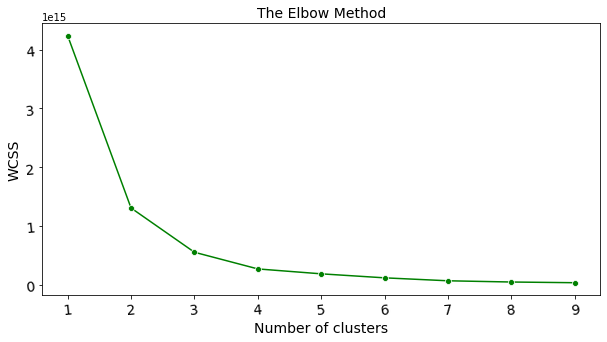

In [32]:
plt.figure(figsize=(10,5))
sns.lineplot(x = range(1, centroids_count), 
             y = wcss,
             marker='o',
             color='green'
            )

plt.title('The Elbow Method', fontsize = 14)
plt.xlabel('Number of clusters', fontsize = 14)
plt.ylabel('WCSS', fontsize = 14)
plt.xticks(fontsize = 14, rotation = 5)
plt.yticks(fontsize = 14, rotation = 5)
plt.show()

3 is selected as the minimum number of clusters to be considered

In [33]:
testData = df3
testData = testData.drop('Cliente',
                         axis = 1
                         ) 
testData

,Producto,total_sem
0,9,1.268100
1,14,35.949199
2,13,126.805198
3,20,0.387500
4,11,5.072000
...,...,...
999995,12,164.141797
999996,13,328.285192
999997,2,7.044800
999998,20,0.140900


In [34]:
testDatan = testData.drop('Producto',
                          axis = 1
                          )
testDatan

,total_sem
0,1.268100
1,35.949199
2,126.805198
3,0.387500
4,5.072000
...,...
999995,164.141797
999996,328.285192
999997,7.044800
999998,0.140900


In [35]:
testDatan[testDatan.columns] = StandardScaler().fit_transform(testDatan)
testDatan

,total_sem
0,-0.353017
1,0.330614
2,2.121561
3,-0.370376
4,-0.278035
...,...
999995,2.857537
999996,6.093120
999997,-0.239147
999998,-0.375236


In [36]:
extracted_col = df3['Producto']
display(extracted_col)

0          9
1         14
2         13
3         20
4         11
          ..
999995    12
999996    13
999997     2
999998    20
999999    23
Name: Producto, Length: 896072, dtype: int64

In [37]:
testDatan.insert(0,'Producto', extracted_col)
testDatan

,Producto,total_sem
0,9,-0.353017
1,14,0.330614
2,13,2.121561
3,20,-0.370376
4,11,-0.278035
...,...,...
999995,12,2.857537
999996,13,6.093120
999997,2,-0.239147
999998,20,-0.375236


In [38]:
kmeans = KMeans(n_clusters = 3,
                random_state = 42
               )
kmeans

KMeans(n_clusters=3, random_state=42)

In [39]:
y_kmeans = kmeans.fit_predict(testDatan)
y_kmeans

array([0, 0, 0, ..., 1, 2, 2], dtype=int32)

In [40]:
y_kmeans.shape

(896072,)

In [41]:
X = np.array(testDatan)
X

array([[ 9.        , -0.35301721],
       [14.        ,  0.33061412],
       [13.        ,  2.12156105],
       ...,
       [ 2.        , -0.23914732],
       [20.        , -0.3752365 ],
       [23.        ,  0.6009849 ]])

In [42]:
X[0]
X[:, 0]

array([ 9., 14., 13., ...,  2., 20., 23.])

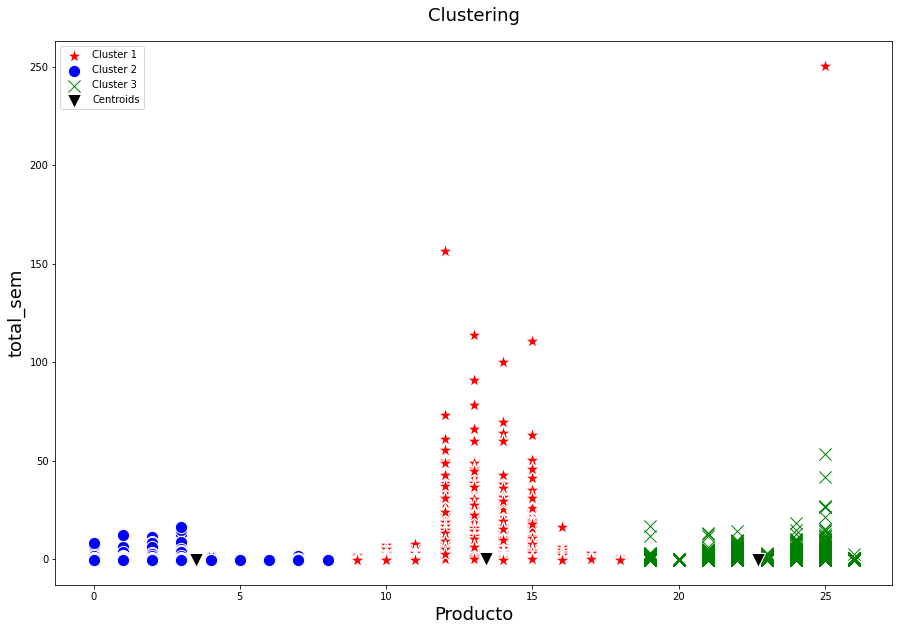

In [43]:
kmeans = KMeans(n_clusters = 3,
                random_state = 42
               )
y_kmeans = kmeans.fit_predict(testDatan)
y_kmeans

X = np.array(testDatan)
 
plt.figure(figsize=(15,10))


sns.scatterplot(x = X[y_kmeans == 0, 0], #y_kmeans == 0 for Cluster 1; column 0
                y = X[y_kmeans == 0, 1], #y_kmeans == 0 for Cluster 1; column 1
                color = 'red', 
                label = 'Cluster 1',
                s=250,
                marker='*'
               )

sns.scatterplot(x = X[y_kmeans == 1, 0], #y_kmeans == 1 for Cluster 2; column 0
                y = X[y_kmeans == 1, 1], #y_kmeans == 1 for Cluster 2; column 1
                color = 'blue', 
                label = 'Cluster 2',
                marker='o',
                s=150
               )

sns.scatterplot(x = X[y_kmeans == 2, 0], #y_kmeans == 2 for Cluster 3; column 0
                y = X[y_kmeans == 2, 1], #y_kmeans == 2 for Cluster 3; column 1
                color = 'green', 
                label = 'Cluster 3',
                marker='x',
                s=150
               )

sns.scatterplot(x = kmeans.cluster_centers_[:, 0], #; column 0 
                y = kmeans.cluster_centers_[:, 1], #; column 1
                color = 'black', 
                label = 'Centroids',
                s=200,
                marker='v'
               )

plt.title('Clustering', fontsize =18, pad = 20)
plt.xlabel('Producto',fontsize =18)
plt.ylabel('total_sem', fontsize =18)
plt.legend()
plt.show()

In [44]:
x = X[y_kmeans == 0, 0] # Cluster 1
y = X[y_kmeans == 0, 1]

In [45]:
x

array([ 9., 14., 13., ..., 15., 12., 13.])

In [46]:
x = X[y_kmeans == 1, 0] # Cluster 2
y = X[y_kmeans == 1, 1]

In [47]:
x

array([8., 1., 1., ..., 8., 1., 2.])

In [48]:
x = X[y_kmeans == 2, 0] #Cluster3
y = X[y_kmeans == 2, 1]

In [49]:
x

array([20., 19., 21., ..., 25., 20., 23.])

CLUSTER 1 - Products that share characteristics:

0-AGUA MINERAL FAMILIAR

1-AGUA MINERAL INDIVIDUAL

2-AGUA PURIFICADA FAMILIAR

3-AGUA PURIFICADA INDIVIDUAL

4-AGUA SABORIZADA INDIVIDUAL

5-BEBIDAS DE SOYA FAMILIAR

6-BEBIDAS DE SOYA INDIVIDUAL

7-BEBIDAS ENERGETICAS

8-BEBIDAS INFANTILES

25-SABORES REGULAR INDIVIDUAL RETORNABLE

CLUSTER 2 - Products that share characteristics:

9-BEBIDAS REFRESCANTES

10-COLAS LIGHT FAMILIAR

11-COLAS LIGHT INDIVIDUAL

12-COLAS REGULAR FAMILIAR NO RETORNABLE

13-COLAS REGULAR FAMILIAR RETORNABLE

14-COLAS REGULAR INDIVIDUAL NO RETORNABLE

15-COLAS REGULAR INDIVIDUAL RETORNABLE

16-ISOTONICOS

17-JUGOS Y NECTARES HOGAR

18-LECHE UHT ESPECIALIZADA

CLUSTER 3 - Products that share characteristics: 

19-LECHE UHT REGULAR

20-LECHE UHT SABORIZADA

21-NARANJADAS

22-SABORES REGULAR FAMILIAR NO RETORNABLE

23-SABORES REGULAR FAMILIAR RETORNABLE

24-SABORES REGULAR INDIVIDUAL NO RETORNABLE

25-SABORES REGULAR INDIVIDUAL RETORNABLE

26-TE

## Market Basket Analysis - General

In [50]:
from mlxtend.preprocessing import TransactionEncoder
from mlxtend.frequent_patterns import apriori
from mlxtend.frequent_patterns import association_rules

In [51]:
df2

,Cliente,Producto,sem44,sem43,sem42,sem41,total_sem
0,500000055,9,0.422700,0.422700,0.000000,0.422700,1.268100
1,500000055,14,8.601600,6.065500,12.680500,8.601600,35.949199
2,500000055,13,26.770000,22.895300,46.847499,30.292399,126.805198
3,500000055,20,0.140900,0.105700,0.000000,0.140900,0.387500
4,500000055,11,0.000000,1.268000,2.536000,1.268000,5.072000
...,...,...,...,...,...,...,...
999995,500257111,12,43.677199,21.838600,70.094898,28.531100,164.141797
999996,500257111,13,89.820498,47.199799,128.214397,63.050498,328.285192
999997,500257111,2,3.522400,0.000000,3.522400,0.000000,7.044800
999998,500257111,20,0.000000,0.000000,0.140900,0.000000,0.140900


## Cluster 1 - Sem41

In [ ]:
dfc1 = df2[['Cliente','Producto','sem41']] #Aqui se ajusta la semana
dfc1

,Cliente,Producto,sem41
0,500000055,9,0.422700
1,500000055,14,8.601600
2,500000055,13,30.292399
3,500000055,20,0.140900
4,500000055,11,1.268000
...,...,...,...
999995,500257111,12,28.531100
999996,500257111,13,63.050498
999997,500257111,2,0.000000
999998,500257111,20,0.000000


In [ ]:
dfc1 = dfc1.loc[((dfc1.Producto!=9)&(dfc1.Producto!=10)&(dfc1.Producto!=11)&(dfc1.Producto!=12)&(dfc1.Producto!=13)&(dfc1.Producto!=14)&(dfc1.Producto!=15)&(dfc1.Producto!=16)&(dfc1.Producto!=17)&(dfc1.Producto!=18)&(dfc1.Producto!=19)&(dfc1.Producto!=20)&(dfc1.Producto!=21)&(dfc1.Producto!=22)&(dfc1.Producto!=23)&(dfc1.Producto!=24)&(dfc1.Producto!=26))]
dfc1

,Cliente,Producto,sem41
5,500000055,8,0.0000
6,500000055,1,1.2681
22,500000058,1,2.5362
26,500000058,25,6.3402
31,500000058,4,1.0567
...,...,...,...
999977,500257109,8,0.5284
999980,500257109,25,0.0000
999992,500257111,1,0.0000
999994,500257111,25,0.0000


In [ ]:
dfcc1 = dfc1[dfc1['sem41']>0]
dfcc1

,Cliente,Producto,sem41
6,500000055,1,1.2681
22,500000058,1,2.5362
26,500000058,25,6.3402
31,500000058,4,1.0567
33,500000058,3,3.1701
...,...,...,...
999942,500257100,8,2.2720
999946,500257100,6,0.4227
999960,500257103,3,1.0567
999967,500257103,25,3.0010


In [ ]:
dfcb1 = dfcc1.pivot(index='Cliente', columns='Producto', values='sem41').reset_index()
print (dfcb1)

Producto    Cliente   0       1       2       3       4   5       6       7  \
0         500000055 NaN  1.2681     NaN     NaN     NaN NaN     NaN     NaN   
1         500000058 NaN  2.5362     NaN  3.1701  1.0567 NaN     NaN     NaN   
2         500000061 NaN     NaN     NaN     NaN     NaN NaN     NaN  0.8616   
3         500000062 NaN     NaN     NaN  2.1134     NaN NaN     NaN     NaN   
4         500000064 NaN  5.0724     NaN  7.3969     NaN NaN     NaN  0.3332   
...             ...  ..     ...     ...     ...     ...  ..     ...     ...   
46339     500257094 NaN     NaN  3.5224  4.3325     NaN NaN     NaN     NaN   
46340     500257096 NaN     NaN     NaN  3.3815  1.0567 NaN     NaN     NaN   
46341     500257100 NaN     NaN  3.5224  7.3970     NaN NaN  0.4227     NaN   
46342     500257103 NaN     NaN     NaN  1.0567     NaN NaN     NaN     NaN   
46343     500257109 NaN     NaN     NaN     NaN     NaN NaN     NaN     NaN   

Producto       8      25  
0            NaN     NaN

In [ ]:
dfcb1a=dfcb1.replace(np.nan,0,regex=True)
dfcb1a

Producto,Cliente,0,1,2,3,4,5,6,7,8,25
0,500000055,0.0,1.2681,0.0000,0.0000,0.0000,0.0,0.0000,0.0000,0.0000,0.0000
1,500000058,0.0,2.5362,0.0000,3.1701,1.0567,0.0,0.0000,0.0000,1.0568,6.3402
2,500000061,0.0,0.0000,0.0000,0.0000,0.0000,0.0,0.0000,0.8616,0.0000,0.0000
3,500000062,0.0,0.0000,0.0000,2.1134,0.0000,0.0,0.0000,0.0000,0.0000,0.0000
4,500000064,0.0,5.0724,0.0000,7.3969,0.0000,0.0,0.0000,0.3332,0.0000,4.2268
...,...,...,...,...,...,...,...,...,...,...,...
46339,500257094,0.0,0.0000,3.5224,4.3325,0.0000,0.0,0.0000,0.0000,0.2642,0.0000
46340,500257096,0.0,0.0000,0.0000,3.3815,1.0567,0.0,0.0000,0.0000,0.0000,2.1134
46341,500257100,0.0,0.0000,3.5224,7.3970,0.0000,0.0,0.4227,0.0000,2.2720,6.3402
46342,500257103,0.0,0.0000,0.0000,1.0567,0.0000,0.0,0.0000,0.0000,0.0000,3.0010


In [ ]:
dfcb1b = dfcb1a.drop(['Cliente'], #None sometimes
                 axis = 1
                )
dfcb1b

Producto,0,1,2,3,4,5,6,7,8,25
0,0.0,1.2681,0.0000,0.0000,0.0000,0.0,0.0000,0.0000,0.0000,0.0000
1,0.0,2.5362,0.0000,3.1701,1.0567,0.0,0.0000,0.0000,1.0568,6.3402
2,0.0,0.0000,0.0000,0.0000,0.0000,0.0,0.0000,0.8616,0.0000,0.0000
3,0.0,0.0000,0.0000,2.1134,0.0000,0.0,0.0000,0.0000,0.0000,0.0000
4,0.0,5.0724,0.0000,7.3969,0.0000,0.0,0.0000,0.3332,0.0000,4.2268
...,...,...,...,...,...,...,...,...,...,...
46339,0.0,0.0000,3.5224,4.3325,0.0000,0.0,0.0000,0.0000,0.2642,0.0000
46340,0.0,0.0000,0.0000,3.3815,1.0567,0.0,0.0000,0.0000,0.0000,2.1134
46341,0.0,0.0000,3.5224,7.3970,0.0000,0.0,0.4227,0.0000,2.2720,6.3402
46342,0.0,0.0000,0.0000,1.0567,0.0000,0.0,0.0000,0.0000,0.0000,3.0010


In [ ]:
dfcb1c=dfcb1b.astype(bool)
dfcb1c

Producto,0,1,2,3,4,5,6,7,8,25
0,False,True,False,False,False,False,False,False,False,False
1,False,True,False,True,True,False,False,False,True,True
2,False,False,False,False,False,False,False,True,False,False
3,False,False,False,True,False,False,False,False,False,False
4,False,True,False,True,False,False,False,True,False,True
...,...,...,...,...,...,...,...,...,...,...
46339,False,False,True,True,False,False,False,False,True,False
46340,False,False,False,True,True,False,False,False,False,True
46341,False,False,True,True,False,False,True,False,True,True
46342,False,False,False,True,False,False,False,False,False,True


In [ ]:
a_rules=apriori(dfcb1c,
                min_support=0.08,
                use_colnames=True
                )
a_rules

,support,itemsets
0,0.107263,(0)
1,0.490937,(1)
2,0.110327,(2)
3,0.489621,(3)
4,0.129553,(4)
5,0.152835,(7)
6,0.229264,(8)
7,0.474387,(25)
8,0.237442,"(1, 3)"
9,0.116132,"(8, 1)"


In [ ]:
rulesc1=association_rules(a_rules,
                        metric='lift',
                        )
rulesc1

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(1),(3),0.490937,0.489621,0.237442,0.483650,0.987804,-0.002932,0.988436
1,(3),(1),0.489621,0.490937,0.237442,0.484950,0.987804,-0.002932,0.988375
2,(8),(1),0.229264,0.490937,0.116132,0.506541,1.031784,0.003577,1.031621
3,(1),(8),0.490937,0.229264,0.116132,0.236551,1.031784,0.003577,1.009545
4,(1),(25),0.490937,0.474387,0.226329,0.461014,0.971810,-0.006565,0.975189
5,(25),(1),0.474387,0.490937,0.226329,0.477098,0.971810,-0.006565,0.973534
6,(3),(4),0.489621,0.129553,0.084499,0.172579,1.332115,0.021067,1.052001
7,(4),(3),0.129553,0.489621,0.084499,0.652232,1.332115,0.021067,1.467584
8,(8),(3),0.229264,0.489621,0.122022,0.532235,1.087035,0.009770,1.091102
9,(3),(8),0.489621,0.229264,0.122022,0.249218,1.087035,0.009770,1.026578


In [ ]:
rulesc1.sort_values(by=['lift'], ascending=True)

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
10,(25),(3),0.474387,0.489621,0.208204,0.438890,0.896387,-0.024066,0.909588
11,(3),(25),0.489621,0.474387,0.208204,0.425235,0.896387,-0.024066,0.914482
4,(1),(25),0.490937,0.474387,0.226329,0.461014,0.971810,-0.006565,0.975189
5,(25),(1),0.474387,0.490937,0.226329,0.477098,0.971810,-0.006565,0.973534
0,(1),(3),0.490937,0.489621,0.237442,0.483650,0.987804,-0.002932,0.988436
1,(3),(1),0.489621,0.490937,0.237442,0.484950,0.987804,-0.002932,0.988375
2,(8),(1),0.229264,0.490937,0.116132,0.506541,1.031784,0.003577,1.031621
3,(1),(8),0.490937,0.229264,0.116132,0.236551,1.031784,0.003577,1.009545
13,(25),(8),0.474387,0.229264,0.115355,0.243166,1.060638,0.006595,1.018369
12,(8),(25),0.229264,0.474387,0.115355,0.503153,1.060638,0.006595,1.057897


## Cluster 1 - Sem42

In [ ]:
dfc2 = df2[['Cliente','Producto','sem42']] #Aqui se ajusta la semana
dfc2

,Cliente,Producto,sem42
0,500000055,9,0.000000
1,500000055,14,12.680500
2,500000055,13,46.847499
3,500000055,20,0.000000
4,500000055,11,2.536000
...,...,...,...
999995,500257111,12,70.094898
999996,500257111,13,128.214397
999997,500257111,2,3.522400
999998,500257111,20,0.140900


In [ ]:
dfc2 = dfc2.loc[((dfc2.Producto!=9)&(dfc2.Producto!=10)&(dfc2.Producto!=11)&(dfc2.Producto!=12)&(dfc2.Producto!=13)&(dfc2.Producto!=14)&(dfc2.Producto!=15)&(dfc2.Producto!=16)&(dfc2.Producto!=17)&(dfc2.Producto!=18)&(dfc2.Producto!=19)&(dfc2.Producto!=20)&(dfc2.Producto!=21)&(dfc2.Producto!=22)&(dfc2.Producto!=23)&(dfc2.Producto!=24)&(dfc2.Producto!=26))]
dfc2

,Cliente,Producto,sem42
5,500000055,8,0.0000
6,500000055,1,0.0000
22,500000058,1,5.0724
26,500000058,25,2.1134
31,500000058,4,0.0000
...,...,...,...
999977,500257109,8,0.5284
999980,500257109,25,0.0000
999992,500257111,1,1.2681
999994,500257111,25,4.2268


In [ ]:
dfcc2 = dfc2[dfc2['sem42']>0]
dfcc2

,Cliente,Producto,sem42
22,500000058,1,5.0724
26,500000058,25,2.1134
33,500000058,3,26.8402
69,500000062,6,0.1409
76,500000062,25,4.2268
...,...,...,...
999967,500257103,25,4.2268
999977,500257109,8,0.5284
999992,500257111,1,1.2681
999994,500257111,25,4.2268


In [ ]:
dfcb2 = dfcc2.pivot(index='Cliente', columns='Producto', values='sem42').reset_index()
print (dfcb2)

Producto    Cliente   0       1       2        3       4       5       6   7  \
0         500000058 NaN  5.0724     NaN  26.8402     NaN     NaN     NaN NaN   
1         500000062 NaN     NaN     NaN   2.1134     NaN     NaN  0.1409 NaN   
2         500000064 NaN  1.2681     NaN   2.5361     NaN     NaN     NaN NaN   
3         500000079 NaN  1.2681  3.5224   2.1134     NaN     NaN     NaN NaN   
4         500000080 NaN     NaN     NaN   7.8196  1.0567  0.4998     NaN NaN   
...             ...  ..     ...     ...      ...     ...     ...     ...  ..   
47478     500257096 NaN  1.2681     NaN   3.3815     NaN     NaN  0.1409 NaN   
47479     500257100 NaN     NaN  3.5224      NaN     NaN     NaN     NaN NaN   
47480     500257103 NaN  1.2680  3.5224      NaN     NaN     NaN  0.1409 NaN   
47481     500257109 NaN     NaN     NaN      NaN     NaN     NaN     NaN NaN   
47482     500257111 NaN  1.2681  3.5224      NaN     NaN     NaN     NaN NaN   

Producto       8      25  
0           

In [ ]:
dfcb2a=dfcb2.replace(np.nan,0,regex=True)
dfcb2a

Producto,Cliente,0,1,2,3,4,5,6,7,8,25
0,500000058,0.0,5.0724,0.0000,26.8402,0.0000,0.0000,0.0000,0.0,0.0000,2.1134
1,500000062,0.0,0.0000,0.0000,2.1134,0.0000,0.0000,0.1409,0.0,0.0000,4.2268
2,500000064,0.0,1.2681,0.0000,2.5361,0.0000,0.0000,0.0000,0.0,0.0000,4.2268
3,500000079,0.0,1.2681,3.5224,2.1134,0.0000,0.0000,0.0000,0.0,0.0000,4.2268
4,500000080,0.0,0.0000,0.0000,7.8196,1.0567,0.4998,0.0000,0.0,0.7926,2.1134
...,...,...,...,...,...,...,...,...,...,...,...
47478,500257096,0.0,1.2681,0.0000,3.3815,0.0000,0.0000,0.1409,0.0,0.7926,2.1134
47479,500257100,0.0,0.0000,3.5224,0.0000,0.0000,0.0000,0.0000,0.0,1.3210,0.0000
47480,500257103,0.0,1.2680,3.5224,0.0000,0.0000,0.0000,0.1409,0.0,0.0000,4.2268
47481,500257109,0.0,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0,0.5284,0.0000


In [ ]:
dfcb2b = dfcb2a.drop(['Cliente'], #None sometimes
                 axis = 1
                )
dfcb2b

Producto,0,1,2,3,4,5,6,7,8,25
0,0.0,5.0724,0.0000,26.8402,0.0000,0.0000,0.0000,0.0,0.0000,2.1134
1,0.0,0.0000,0.0000,2.1134,0.0000,0.0000,0.1409,0.0,0.0000,4.2268
2,0.0,1.2681,0.0000,2.5361,0.0000,0.0000,0.0000,0.0,0.0000,4.2268
3,0.0,1.2681,3.5224,2.1134,0.0000,0.0000,0.0000,0.0,0.0000,4.2268
4,0.0,0.0000,0.0000,7.8196,1.0567,0.4998,0.0000,0.0,0.7926,2.1134
...,...,...,...,...,...,...,...,...,...,...
47478,0.0,1.2681,0.0000,3.3815,0.0000,0.0000,0.1409,0.0,0.7926,2.1134
47479,0.0,0.0000,3.5224,0.0000,0.0000,0.0000,0.0000,0.0,1.3210,0.0000
47480,0.0,1.2680,3.5224,0.0000,0.0000,0.0000,0.1409,0.0,0.0000,4.2268
47481,0.0,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0,0.5284,0.0000


In [ ]:
dfcb2c=dfcb2b.astype(bool)
dfcb2c

Producto,0,1,2,3,4,5,6,7,8,25
0,False,True,False,True,False,False,False,False,False,True
1,False,False,False,True,False,False,True,False,False,True
2,False,True,False,True,False,False,False,False,False,True
3,False,True,True,True,False,False,False,False,False,True
4,False,False,False,True,True,True,False,False,True,True
...,...,...,...,...,...,...,...,...,...,...
47478,False,True,False,True,False,False,True,False,True,True
47479,False,False,True,False,False,False,False,False,True,False
47480,False,True,True,False,False,False,True,False,False,True
47481,False,False,False,False,False,False,False,False,True,False


In [ ]:
a_rules=apriori(dfcb2c,
                min_support=0.08,
                use_colnames=True
                )
a_rules

,support,itemsets
0,0.103616,(0)
1,0.505486,(1)
2,0.115536,(2)
3,0.529600,(3)
4,0.139524,(4)
5,0.081840,(6)
6,0.131984,(7)
7,0.219531,(8)
8,0.486911,(25)
9,0.268370,"(1, 3)"


In [ ]:
rulesc2=association_rules(a_rules,
                        metric='lift',
                        )
rulesc2

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(1),(3),0.505486,0.529600,0.268370,0.530914,1.002481,0.000664,1.002801
1,(3),(1),0.529600,0.505486,0.268370,0.506740,1.002481,0.000664,1.002543
2,(1),(4),0.505486,0.139524,0.087105,0.172319,1.235052,0.016578,1.039623
3,(4),(1),0.139524,0.505486,0.087105,0.624302,1.235052,0.016578,1.316253
4,(8),(1),0.219531,0.505486,0.117137,0.533576,1.055571,0.006167,1.060225
5,(1),(8),0.505486,0.219531,0.117137,0.231731,1.055571,0.006167,1.015879
6,(1),(25),0.505486,0.486911,0.242613,0.479960,0.985724,-0.003514,0.986634
7,(25),(1),0.486911,0.505486,0.242613,0.498270,0.985724,-0.003514,0.985617
8,(3),(4),0.529600,0.139524,0.101700,0.192031,1.376332,0.027808,1.064987
9,(4),(3),0.139524,0.529600,0.101700,0.728906,1.376332,0.027808,1.735189


In [ ]:
rulesc2.sort_values(by=['lift'], ascending=True)

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
13,(3),(25),0.529600,0.486911,0.237453,0.448364,0.920833,-0.020415,0.930122
12,(25),(3),0.486911,0.529600,0.237453,0.487673,0.920833,-0.020415,0.918163
6,(1),(25),0.505486,0.486911,0.242613,0.479960,0.985724,-0.003514,0.986634
7,(25),(1),0.486911,0.505486,0.242613,0.498270,0.985724,-0.003514,0.985617
0,(1),(3),0.505486,0.529600,0.268370,0.530914,1.002481,0.000664,1.002801
1,(3),(1),0.529600,0.505486,0.268370,0.506740,1.002481,0.000664,1.002543
4,(8),(1),0.219531,0.505486,0.117137,0.533576,1.055571,0.006167,1.060225
5,(1),(8),0.505486,0.219531,0.117137,0.231731,1.055571,0.006167,1.015879
16,"(1, 3)",(25),0.268370,0.486911,0.138765,0.517068,1.061936,0.008093,1.062446
21,(25),"(1, 3)",0.486911,0.268370,0.138765,0.284991,1.061936,0.008093,1.023247


## Cluster 1 - Sem43

In [ ]:
dfc3 = df2[['Cliente','Producto','sem43']] #Aqui se ajusta la semana
dfc3

,Cliente,Producto,sem43
0,500000055,9,0.422700
1,500000055,14,6.065500
2,500000055,13,22.895300
3,500000055,20,0.105700
4,500000055,11,1.268000
...,...,...,...
999995,500257111,12,21.838600
999996,500257111,13,47.199799
999997,500257111,2,0.000000
999998,500257111,20,0.000000


In [ ]:
dfc3 = dfc3.loc[((dfc3.Producto!=9)&(dfc3.Producto!=10)&(dfc3.Producto!=11)&(dfc3.Producto!=12)&(dfc3.Producto!=13)&(dfc3.Producto!=14)&(dfc3.Producto!=15)&(dfc3.Producto!=16)&(dfc3.Producto!=17)&(dfc3.Producto!=18)&(dfc3.Producto!=19)&(dfc3.Producto!=20)&(dfc3.Producto!=21)&(dfc3.Producto!=22)&(dfc3.Producto!=23)&(dfc3.Producto!=24)&(dfc3.Producto!=26))]
dfc3

,Cliente,Producto,sem43
5,500000055,8,0.2642
6,500000055,1,0.0000
22,500000058,1,1.2681
26,500000058,25,4.2268
31,500000058,4,0.0000
...,...,...,...
999977,500257109,8,0.0000
999980,500257109,25,8.4536
999992,500257111,1,0.0000
999994,500257111,25,3.6139


In [ ]:
dfcc3 = dfc3[dfc3['sem43']>0]
dfcc3

,Cliente,Producto,sem43
5,500000055,8,0.2642
22,500000058,1,1.2681
26,500000058,25,4.2268
33,500000058,3,2.1134
45,500000061,25,2.1134
...,...,...,...
999937,500257100,1,2.5362
999946,500257100,6,0.1409
999950,500257103,6,0.1409
999980,500257109,25,8.4536


In [ ]:
dfcb3 = dfcc3.pivot(index='Cliente', columns='Producto', values='sem43').reset_index()
print (dfcb3)

Producto    Cliente       0       1   2       3       4   5       6       7  \
0         500000055     NaN     NaN NaN     NaN     NaN NaN     NaN     NaN   
1         500000058     NaN  1.2681 NaN  2.1134     NaN NaN     NaN     NaN   
2         500000061     NaN     NaN NaN  3.1701     NaN NaN     NaN     NaN   
3         500000062     NaN     NaN NaN  5.2835     NaN NaN     NaN     NaN   
4         500000064  1.5851  3.8043 NaN  8.4536  2.1134 NaN     NaN  0.3332   
...             ...     ...     ...  ..     ...     ...  ..     ...     ...   
45329     500257096     NaN     NaN NaN     NaN     NaN NaN     NaN     NaN   
45330     500257100     NaN  2.5362 NaN     NaN     NaN NaN  0.1409     NaN   
45331     500257103     NaN     NaN NaN     NaN     NaN NaN  0.1409     NaN   
45332     500257109     NaN     NaN NaN     NaN     NaN NaN     NaN     NaN   
45333     500257111     NaN     NaN NaN     NaN     NaN NaN     NaN     NaN   

Producto       8      25  
0         0.2642     NaN

In [ ]:
dfcb3a=dfcb3.replace(np.nan,0,regex=True)
dfcb3a

Producto,Cliente,0,1,2,3,4,5,6,7,8,25
0,500000055,0.0000,0.0000,0.0,0.0000,0.0000,0.0,0.0000,0.0000,0.2642,0.0000
1,500000058,0.0000,1.2681,0.0,2.1134,0.0000,0.0,0.0000,0.0000,0.0000,4.2268
2,500000061,0.0000,0.0000,0.0,3.1701,0.0000,0.0,0.0000,0.0000,0.0000,2.1134
3,500000062,0.0000,0.0000,0.0,5.2835,0.0000,0.0,0.0000,0.0000,0.0000,8.4536
4,500000064,1.5851,3.8043,0.0,8.4536,2.1134,0.0,0.0000,0.3332,0.0000,4.2268
...,...,...,...,...,...,...,...,...,...,...,...
45329,500257096,0.0000,0.0000,0.0,0.0000,0.0000,0.0,0.0000,0.0000,0.0000,2.1134
45330,500257100,0.0000,2.5362,0.0,0.0000,0.0000,0.0,0.1409,0.0000,0.0000,4.2268
45331,500257103,0.0000,0.0000,0.0,0.0000,0.0000,0.0,0.1409,0.0000,0.0000,0.0000
45332,500257109,0.0000,0.0000,0.0,0.0000,0.0000,0.0,0.0000,0.0000,0.0000,8.4536


In [ ]:
dfcb3b = dfcb3a.drop(['Cliente'], #None sometimes
                 axis = 1
                )
dfcb3b

Producto,0,1,2,3,4,5,6,7,8,25
0,0.0000,0.0000,0.0,0.0000,0.0000,0.0,0.0000,0.0000,0.2642,0.0000
1,0.0000,1.2681,0.0,2.1134,0.0000,0.0,0.0000,0.0000,0.0000,4.2268
2,0.0000,0.0000,0.0,3.1701,0.0000,0.0,0.0000,0.0000,0.0000,2.1134
3,0.0000,0.0000,0.0,5.2835,0.0000,0.0,0.0000,0.0000,0.0000,8.4536
4,1.5851,3.8043,0.0,8.4536,2.1134,0.0,0.0000,0.3332,0.0000,4.2268
...,...,...,...,...,...,...,...,...,...,...
45329,0.0000,0.0000,0.0,0.0000,0.0000,0.0,0.0000,0.0000,0.0000,2.1134
45330,0.0000,2.5362,0.0,0.0000,0.0000,0.0,0.1409,0.0000,0.0000,4.2268
45331,0.0000,0.0000,0.0,0.0000,0.0000,0.0,0.1409,0.0000,0.0000,0.0000
45332,0.0000,0.0000,0.0,0.0000,0.0000,0.0,0.0000,0.0000,0.0000,8.4536


In [ ]:
dfcb3c=dfcb3b.astype(bool)
dfcb3c

Producto,0,1,2,3,4,5,6,7,8,25
0,False,False,False,False,False,False,False,False,True,False
1,False,True,False,True,False,False,False,False,False,True
2,False,False,False,True,False,False,False,False,False,True
3,False,False,False,True,False,False,False,False,False,True
4,True,True,False,True,True,False,False,True,False,True
...,...,...,...,...,...,...,...,...,...,...
45329,False,False,False,False,False,False,False,False,False,True
45330,False,True,False,False,False,False,True,False,False,True
45331,False,False,False,False,False,False,True,False,False,False
45332,False,False,False,False,False,False,False,False,False,True


In [ ]:
a_rules=apriori(dfcb3c,
                min_support=0.08,
                use_colnames=True
                )
a_rules

,support,itemsets
0,0.082587,(0)
1,0.457912,(1)
2,0.103785,(2)
3,0.502471,(3)
4,0.132152,(4)
5,0.124454,(6)
6,0.127366,(7)
7,0.217122,(8)
8,0.464684,(25)
9,0.230820,"(1, 3)"


In [ ]:
rulesc3=association_rules(a_rules,
                        metric='lift',
                        )
rulesc3

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(1),(3),0.457912,0.502471,0.230820,0.504071,1.003184,0.000733,1.003226
1,(3),(1),0.502471,0.457912,0.230820,0.459370,1.003184,0.000733,1.002697
2,(8),(1),0.217122,0.457912,0.098293,0.452708,0.988633,-0.001130,0.990490
3,(1),(8),0.457912,0.217122,0.098293,0.214654,0.988633,-0.001130,0.996858
4,(1),(25),0.457912,0.464684,0.200203,0.437208,0.940871,-0.012582,0.951178
5,(25),(1),0.464684,0.457912,0.200203,0.430836,0.940871,-0.012582,0.952429
6,(3),(4),0.502471,0.132152,0.092028,0.183151,1.385908,0.025625,1.062433
7,(4),(3),0.132152,0.502471,0.092028,0.696378,1.385908,0.025625,1.638647
8,(8),(3),0.217122,0.502471,0.111042,0.511429,1.017830,0.001945,1.018337
9,(3),(8),0.502471,0.217122,0.111042,0.220993,1.017830,0.001945,1.004969


In [ ]:
rulesc3.sort_values(by=['lift'], ascending=True)

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
11,(3),(25),0.502471,0.464684,0.208607,0.415163,0.893430,-0.024883,0.915325
10,(25),(3),0.464684,0.502471,0.208607,0.448922,0.893430,-0.024883,0.902830
4,(1),(25),0.457912,0.464684,0.200203,0.437208,0.940871,-0.012582,0.951178
5,(25),(1),0.464684,0.457912,0.200203,0.430836,0.940871,-0.012582,0.952429
3,(1),(8),0.457912,0.217122,0.098293,0.214654,0.988633,-0.001130,0.996858
2,(8),(1),0.217122,0.457912,0.098293,0.452708,0.988633,-0.001130,0.990490
0,(1),(3),0.457912,0.502471,0.230820,0.504071,1.003184,0.000733,1.003226
1,(3),(1),0.502471,0.457912,0.230820,0.459370,1.003184,0.000733,1.002697
9,(3),(8),0.502471,0.217122,0.111042,0.220993,1.017830,0.001945,1.004969
8,(8),(3),0.217122,0.502471,0.111042,0.511429,1.017830,0.001945,1.018337


## Cluster 1 - Sem44

In [52]:
dfc4 = df2[['Cliente','Producto','sem44']] #Aqui se ajusta la semana
dfc4

,Cliente,Producto,sem44
0,500000055,9,0.422700
1,500000055,14,8.601600
2,500000055,13,26.770000
3,500000055,20,0.140900
4,500000055,11,0.000000
...,...,...,...
999995,500257111,12,43.677199
999996,500257111,13,89.820498
999997,500257111,2,3.522400
999998,500257111,20,0.000000


In [54]:
dfc4 = dfc4.loc[((dfc4.Producto!=9)&(dfc4.Producto!=10)&(dfc4.Producto!=11)&(dfc4.Producto!=12)&(dfc4.Producto!=13)&(dfc4.Producto!=14)&(dfc4.Producto!=15)&(dfc4.Producto!=16)&(dfc4.Producto!=17)&(dfc4.Producto!=18)&(dfc4.Producto!=19)&(dfc4.Producto!=20)&(dfc4.Producto!=21)&(dfc4.Producto!=22)&(dfc4.Producto!=23)&(dfc4.Producto!=24)&(dfc4.Producto!=26))]
dfc4

,Cliente,Producto,sem44
5,500000055,8,0.0000
6,500000055,1,0.0000
22,500000058,1,3.8043
26,500000058,25,0.0000
31,500000058,4,0.0000
...,...,...,...
999977,500257109,8,0.5284
999980,500257109,25,4.2268
999992,500257111,1,1.2681
999994,500257111,25,2.1134


In [ ]:
dfcc4 = dfc4[dfc4['sem44']>0]
dfcc4

,Cliente,Producto,sem44
22,500000058,1,3.8043
38,500000061,0,1.5851
43,500000061,1,1.2681
76,500000062,25,4.2268
78,500000062,3,2.1134
...,...,...,...
999977,500257109,8,0.5284
999980,500257109,25,4.2268
999992,500257111,1,1.2681
999994,500257111,25,2.1134


In [ ]:
dfcb4 = dfcc4.pivot(index='Cliente', columns='Producto', values='sem44').reset_index()
print (dfcb4)

Producto    Cliente       0       1       2       3       4   5   6   7  \
0         500000058     NaN  3.8043     NaN     NaN     NaN NaN NaN NaN   
1         500000061  1.5851  1.2681     NaN     NaN     NaN NaN NaN NaN   
2         500000062     NaN     NaN     NaN  2.1134     NaN NaN NaN NaN   
3         500000064     NaN  5.0724     NaN  5.7062     NaN NaN NaN NaN   
4         500000079     NaN     NaN     NaN     NaN     NaN NaN NaN NaN   
...             ...     ...     ...     ...     ...     ...  ..  ..  ..   
46454     500257096  1.5851  1.2681     NaN  2.1134     NaN NaN NaN NaN   
46455     500257100     NaN     NaN     NaN     NaN  1.0567 NaN NaN NaN   
46456     500257103     NaN  1.5005  3.5224     NaN     NaN NaN NaN NaN   
46457     500257109     NaN  1.2681     NaN     NaN     NaN NaN NaN NaN   
46458     500257111     NaN  1.2681  3.5224     NaN     NaN NaN NaN NaN   

Producto       8      25  
0            NaN     NaN  
1            NaN     NaN  
2            NaN  

In [ ]:
dfcb4a=dfcb4.replace(np.nan,0,regex=True)
dfcb4a

Producto,Cliente,0,1,2,3,4,5,6,7,8,25
0,500000058,0.0000,3.8043,0.0000,0.0000,0.0000,0.0,0.0,0.0,0.0000,0.0000
1,500000061,1.5851,1.2681,0.0000,0.0000,0.0000,0.0,0.0,0.0,0.0000,0.0000
2,500000062,0.0000,0.0000,0.0000,2.1134,0.0000,0.0,0.0,0.0,0.0000,4.2268
3,500000064,0.0000,5.0724,0.0000,5.7062,0.0000,0.0,0.0,0.0,0.0000,0.0000
4,500000079,0.0000,0.0000,0.0000,0.0000,0.0000,0.0,0.0,0.0,0.0000,2.1134
...,...,...,...,...,...,...,...,...,...,...,...
46454,500257096,1.5851,1.2681,0.0000,2.1134,0.0000,0.0,0.0,0.0,1.0568,0.0000
46455,500257100,0.0000,0.0000,0.0000,0.0000,1.0567,0.0,0.0,0.0,2.0078,0.0000
46456,500257103,0.0000,1.5005,3.5224,0.0000,0.0000,0.0,0.0,0.0,0.0000,0.0000
46457,500257109,0.0000,1.2681,0.0000,0.0000,0.0000,0.0,0.0,0.0,0.5284,4.2268


In [ ]:
dfcb4b = dfcb4a.drop(['Cliente'], #None sometimes
                 axis = 1
                )
dfcb4b

Producto,0,1,2,3,4,5,6,7,8,25
0,0.0000,3.8043,0.0000,0.0000,0.0000,0.0,0.0,0.0,0.0000,0.0000
1,1.5851,1.2681,0.0000,0.0000,0.0000,0.0,0.0,0.0,0.0000,0.0000
2,0.0000,0.0000,0.0000,2.1134,0.0000,0.0,0.0,0.0,0.0000,4.2268
3,0.0000,5.0724,0.0000,5.7062,0.0000,0.0,0.0,0.0,0.0000,0.0000
4,0.0000,0.0000,0.0000,0.0000,0.0000,0.0,0.0,0.0,0.0000,2.1134
...,...,...,...,...,...,...,...,...,...,...
46454,1.5851,1.2681,0.0000,2.1134,0.0000,0.0,0.0,0.0,1.0568,0.0000
46455,0.0000,0.0000,0.0000,0.0000,1.0567,0.0,0.0,0.0,2.0078,0.0000
46456,0.0000,1.5005,3.5224,0.0000,0.0000,0.0,0.0,0.0,0.0000,0.0000
46457,0.0000,1.2681,0.0000,0.0000,0.0000,0.0,0.0,0.0,0.5284,4.2268


In [ ]:
dfcb4c=dfcb4b.astype(bool)
dfcb4c

Producto,0,1,2,3,4,5,6,7,8,25
0,False,True,False,False,False,False,False,False,False,False
1,True,True,False,False,False,False,False,False,False,False
2,False,False,False,True,False,False,False,False,False,True
3,False,True,False,True,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,True
...,...,...,...,...,...,...,...,...,...,...
46454,True,True,False,True,False,False,False,False,True,False
46455,False,False,False,False,True,False,False,False,True,False
46456,False,True,True,False,False,False,False,False,False,False
46457,False,True,False,False,False,False,False,False,True,True


In [ ]:
a_rules=apriori(dfcb4c,
                min_support=0.08,
                use_colnames=True
                )
a_rules

,support,itemsets
0,0.090144,(0)
1,0.470996,(1)
2,0.108827,(2)
3,0.503950,(3)
4,0.131083,(4)
5,0.088422,(6)
6,0.141932,(7)
7,0.223681,(8)
8,0.481112,(25)
9,0.237995,"(1, 3)"


In [ ]:
rulesc4=association_rules(a_rules,
                        metric='lift',
                        )
rulesc4

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(1),(3),0.470996,0.503950,0.237995,0.505301,1.002682,0.000637,1.002732
1,(3),(1),0.503950,0.470996,0.237995,0.472259,1.002682,0.000637,1.002393
2,(8),(1),0.223681,0.470996,0.108720,0.486047,1.031956,0.003367,1.029285
3,(1),(8),0.470996,0.223681,0.108720,0.230829,1.031956,0.003367,1.009293
4,(1),(25),0.470996,0.481112,0.217482,0.461749,0.959754,-0.009120,0.964026
5,(25),(1),0.481112,0.470996,0.217482,0.452040,0.959754,-0.009120,0.965407
6,(3),(4),0.503950,0.131083,0.090811,0.180199,1.374691,0.024752,1.059912
7,(4),(3),0.131083,0.503950,0.090811,0.692775,1.374691,0.024752,1.614616
8,(8),(3),0.223681,0.503950,0.119460,0.534065,1.059758,0.006736,1.064633
9,(3),(8),0.503950,0.223681,0.119460,0.237048,1.059758,0.006736,1.017520


In [ ]:
rulesc4.sort_values(by=['lift'], ascending=True)

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
11,(3),(25),0.503950,0.481112,0.218472,0.433520,0.901078,-0.023984,0.915986
10,(25),(3),0.481112,0.503950,0.218472,0.454098,0.901078,-0.023984,0.908680
4,(1),(25),0.470996,0.481112,0.217482,0.461749,0.959754,-0.009120,0.964026
5,(25),(1),0.481112,0.470996,0.217482,0.452040,0.959754,-0.009120,0.965407
0,(1),(3),0.470996,0.503950,0.237995,0.505301,1.002682,0.000637,1.002732
1,(3),(1),0.503950,0.470996,0.237995,0.472259,1.002682,0.000637,1.002393
3,(1),(8),0.470996,0.223681,0.108720,0.230829,1.031956,0.003367,1.009293
2,(8),(1),0.223681,0.470996,0.108720,0.486047,1.031956,0.003367,1.029285
14,"(1, 3)",(25),0.237995,0.481112,0.118556,0.498146,1.035405,0.004054,1.033941
19,(25),"(1, 3)",0.481112,0.237995,0.118556,0.246421,1.035405,0.004054,1.011181


#Cluser 2 - Sem41

In [56]:
dfc21 = df2[['Cliente','Producto','sem41']] #Aqui se ajusta la semana
dfc21

,Cliente,Producto,sem41
0,500000055,9,0.422700
1,500000055,14,8.601600
2,500000055,13,30.292399
3,500000055,20,0.140900
4,500000055,11,1.268000
...,...,...,...
999995,500257111,12,28.531100
999996,500257111,13,63.050498
999997,500257111,2,0.000000
999998,500257111,20,0.000000


In [57]:
dfc21 = dfc21.loc[((dfc21.Producto!=0)&(dfc21.Producto!=1)&(dfc21.Producto!=2)&(dfc21.Producto!=3)&(dfc21.Producto!=4)&(dfc21.Producto!=5)&(dfc21.Producto!=6)&(dfc21.Producto!=7)&(dfc21.Producto!=8)&(dfc21.Producto!=25)&(dfc21.Producto!=19)&(dfc21.Producto!=20)&(dfc21.Producto!=21)&(dfc21.Producto!=22)&(dfc21.Producto!=23)&(dfc21.Producto!=24)&(dfc21.Producto!=26))]
dfc21

,Cliente,Producto,sem41
0,500000055,9,0.422700
1,500000055,14,8.601600
2,500000055,13,30.292399
4,500000055,11,1.268000
8,500000055,17,0.612500
...,...,...,...
999985,500257109,13,3.522400
999990,500257111,17,4.838700
999991,500257111,15,4.226800
999995,500257111,12,28.531100


In [58]:
dfc21a = dfc21[dfc21['sem41']>0]
dfc21a

,Cliente,Producto,sem41
0,500000055,9,0.422700
1,500000055,14,8.601600
2,500000055,13,30.292399
4,500000055,11,1.268000
8,500000055,17,0.612500
...,...,...,...
999985,500257109,13,3.522400
999990,500257111,17,4.838700
999991,500257111,15,4.226800
999995,500257111,12,28.531100


In [59]:
dfc21b = dfc21a.pivot(index='Cliente', columns='Producto', values='sem41').reset_index()
print (dfc21b)

Producto    Cliente       9  10      11         12          13       14  \
0         500000055  0.4227 NaN  1.2680        NaN   30.292399   8.6016   
1         500000058     NaN NaN  4.6494  26.946299   98.274098  19.1813   
2         500000061  1.2681 NaN  2.5361  13.737300   15.850700   7.5660   
3         500000062     NaN NaN     NaN   6.164200   12.680600  10.5586   
4         500000064     NaN NaN  1.9020  13.209000  100.387698  18.6825   
...             ...     ...  ..     ...        ...         ...      ...   
63662     500257098     NaN NaN     NaN        NaN         NaN      NaN   
63663     500257100  0.8454 NaN  6.0128  78.549098   33.814799  12.7548   
63664     500257103  0.4227 NaN  0.6340  12.328300   20.782099   1.7648   
63665     500257109     NaN NaN     NaN        NaN    3.522400   2.5362   
63666     500257111     NaN NaN     NaN  28.531100   63.050498      NaN   

Producto       15       16      17      18  
0         12.6804      NaN  0.6125     NaN  
1        

In [60]:
dfc21c=dfc21b.replace(np.nan,0,regex=True)
dfc21c

Producto,Cliente,9,10,11,12,13,14,15,16,17,18
0,500000055,0.4227,0.0,1.2680,0.000000,30.292399,8.6016,12.6804,0.0000,0.6125,0.0000
1,500000058,0.0000,0.0,4.6494,26.946299,98.274098,19.1813,8.4536,6.7628,5.1297,0.0000
2,500000061,1.2681,0.0,2.5361,13.737300,15.850700,7.5660,2.1134,0.0000,1.0567,0.0000
3,500000062,0.0000,0.0,0.0000,6.164200,12.680600,10.5586,2.1134,1.6907,0.5008,0.0000
4,500000064,0.0000,0.0,1.9020,13.209000,100.387698,18.6825,12.6804,0.0000,4.7397,0.0000
...,...,...,...,...,...,...,...,...,...,...,...
63662,500257098,0.0000,0.0,0.0000,0.000000,0.000000,0.0000,2.1134,0.6340,0.0000,0.0000
63663,500257100,0.8454,0.0,6.0128,78.549098,33.814799,12.7548,3.6139,11.3068,4.0579,0.0000
63664,500257103,0.4227,0.0,0.6340,12.328300,20.782099,1.7648,7.8407,1.2680,2.8870,1.0567
63665,500257109,0.0000,0.0,0.0000,0.000000,3.522400,2.5362,4.2268,1.2680,0.0000,0.0000


In [61]:
dfc21d = dfc21c.drop(['Cliente'], #None sometimes
                 axis = 1
                )
dfc21d

Producto,9,10,11,12,13,14,15,16,17,18
0,0.4227,0.0,1.2680,0.000000,30.292399,8.6016,12.6804,0.0000,0.6125,0.0000
1,0.0000,0.0,4.6494,26.946299,98.274098,19.1813,8.4536,6.7628,5.1297,0.0000
2,1.2681,0.0,2.5361,13.737300,15.850700,7.5660,2.1134,0.0000,1.0567,0.0000
3,0.0000,0.0,0.0000,6.164200,12.680600,10.5586,2.1134,1.6907,0.5008,0.0000
4,0.0000,0.0,1.9020,13.209000,100.387698,18.6825,12.6804,0.0000,4.7397,0.0000
...,...,...,...,...,...,...,...,...,...,...
63662,0.0000,0.0,0.0000,0.000000,0.000000,0.0000,2.1134,0.6340,0.0000,0.0000
63663,0.8454,0.0,6.0128,78.549098,33.814799,12.7548,3.6139,11.3068,4.0579,0.0000
63664,0.4227,0.0,0.6340,12.328300,20.782099,1.7648,7.8407,1.2680,2.8870,1.0567
63665,0.0000,0.0,0.0000,0.000000,3.522400,2.5362,4.2268,1.2680,0.0000,0.0000


In [62]:
dfc21e=dfc21d.astype(bool)
dfc21e

Producto,9,10,11,12,13,14,15,16,17,18
0,True,False,True,False,True,True,True,False,True,False
1,False,False,True,True,True,True,True,True,True,False
2,True,False,True,True,True,True,True,False,True,False
3,False,False,False,True,True,True,True,True,True,False
4,False,False,True,True,True,True,True,False,True,False
...,...,...,...,...,...,...,...,...,...,...
63662,False,False,False,False,False,False,True,True,False,False
63663,True,False,True,True,True,True,True,True,True,False
63664,True,False,True,True,True,True,True,True,True,True
63665,False,False,False,False,True,True,True,True,False,False


In [63]:
a_rulesC2S1=apriori(dfc21e,
                min_support=0.08,
                use_colnames=True
                )
a_rulesC2S1

,support,itemsets
0,0.255219,(9)
1,0.165643,(10)
2,0.492139,(11)
3,0.736017,(12)
4,0.795781,(13)
...,...,...
349,0.080748,"(9, 11, 13, 14, 15, 16, 17)"
350,0.100335,"(9, 12, 13, 14, 15, 16, 17)"
351,0.081031,"(10, 11, 12, 13, 14, 15, 16)"
352,0.084486,"(10, 11, 12, 13, 14, 15, 17)"


In [65]:
rulesc2s2=association_rules(a_rulesC2S1,
                        metric='lift',
                        )
rulesc2s2

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(9),(11),0.255219,0.492139,0.171942,0.673703,1.368929,0.046339,1.556438
1,(11),(9),0.492139,0.255219,0.171942,0.349376,1.368929,0.046339,1.144719
2,(9),(12),0.255219,0.736017,0.223287,0.874885,1.188674,0.035442,2.109916
3,(12),(9),0.736017,0.255219,0.223287,0.303372,1.188674,0.035442,1.069123
4,(9),(13),0.255219,0.795781,0.223460,0.875562,1.100254,0.020361,1.641123
...,...,...,...,...,...,...,...,...,...
7981,(13),"(11, 12, 14, 15, 16, 17)",0.795781,0.156518,0.147219,0.185000,1.181973,0.022665,1.034947
7982,(14),"(11, 12, 13, 15, 16, 17)",0.795624,0.150565,0.147219,0.185036,1.228947,0.027426,1.042298
7983,(15),"(11, 12, 13, 14, 16, 17)",0.793504,0.157947,0.147219,0.185530,1.174639,0.021888,1.033867
7984,(16),"(11, 12, 13, 14, 15, 17)",0.404872,0.210109,0.147219,0.363619,1.730621,0.062152,1.241223


In [66]:
rulesc2s2.sort_values(by=['lift'], ascending=True)

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
51,(14),(13),0.795624,0.795781,0.645782,0.811667,1.019963,0.012639,1.084351
50,(13),(14),0.795781,0.795624,0.645782,0.811507,1.019963,0.012639,1.084262
59,(15),(14),0.793504,0.795624,0.649018,0.817914,1.028015,0.017687,1.122412
58,(14),(15),0.795624,0.793504,0.649018,0.815734,1.028015,0.017687,1.120642
45,(15),(12),0.793504,0.736017,0.605070,0.762530,1.036022,0.021038,1.111646
...,...,...,...,...,...,...,...,...,...
5939,"(16, 11, 12, 13)","(10, 15)",0.213847,0.145177,0.081863,0.382813,2.636867,0.050818,1.385031
7658,"(16, 11, 12, 13)","(10, 14, 15)",0.213847,0.141690,0.081031,0.378920,2.674284,0.050731,1.381964
7683,"(10, 14, 15)","(16, 11, 12, 13)",0.141690,0.213847,0.081031,0.571888,2.674284,0.050731,1.836325
7710,"(10, 15)","(11, 12, 13, 14, 16)",0.145177,0.207831,0.081031,0.558152,2.685601,0.050859,1.792854


##Cluster 2 - Sem42

In [67]:
dfc22 = df2[['Cliente','Producto','sem42']] #Aqui se ajusta la semana
dfc22

,Cliente,Producto,sem42
0,500000055,9,0.000000
1,500000055,14,12.680500
2,500000055,13,46.847499
3,500000055,20,0.000000
4,500000055,11,2.536000
...,...,...,...
999995,500257111,12,70.094898
999996,500257111,13,128.214397
999997,500257111,2,3.522400
999998,500257111,20,0.140900


In [68]:
dfc22 = dfc22.loc[((dfc22.Producto!=0)&(dfc22.Producto!=1)&(dfc22.Producto!=2)&(dfc22.Producto!=3)&(dfc22.Producto!=4)&(dfc22.Producto!=5)&(dfc22.Producto!=6)&(dfc22.Producto!=7)&(dfc22.Producto!=8)&(dfc22.Producto!=25)&(dfc22.Producto!=19)&(dfc22.Producto!=20)&(dfc22.Producto!=21)&(dfc22.Producto!=22)&(dfc22.Producto!=23)&(dfc22.Producto!=24)&(dfc22.Producto!=26))]
dfc22

,Cliente,Producto,sem42
0,500000055,9,0.000000
1,500000055,14,12.680500
2,500000055,13,46.847499
4,500000055,11,2.536000
8,500000055,17,0.872800
...,...,...,...
999985,500257109,13,7.044800
999990,500257111,17,4.866300
999991,500257111,15,8.453600
999995,500257111,12,70.094898


In [69]:
dfc22a = dfc22[dfc22['sem42']>0]
dfc22a

,Cliente,Producto,sem42
1,500000055,14,12.680500
2,500000055,13,46.847499
4,500000055,11,2.536000
8,500000055,17,0.872800
11,500000055,12,6.164200
...,...,...,...
999985,500257109,13,7.044800
999990,500257111,17,4.866300
999991,500257111,15,8.453600
999995,500257111,12,70.094898


In [70]:
dfc22b = dfc22a.pivot(index='Cliente', columns='Producto', values='sem42').reset_index()
print (dfc22b)

Producto    Cliente       9      10      11         12          13         14  \
0         500000055     NaN     NaN  2.5360   6.164200   46.847499  12.680500   
1         500000058     NaN  2.4656     NaN  24.656799  163.085698  45.966600   
2         500000061  1.6908     NaN  3.8041  16.379100   13.737300  14.679800   
3         500000062     NaN     NaN  1.2680  13.209000   12.328300   9.108800   
4         500000064     NaN     NaN  4.3008   9.686600   92.990798  21.738601   
...             ...     ...     ...     ...        ...         ...        ...   
63778     500257098     NaN     NaN     NaN   3.522400    9.862600   1.764800   
63779     500257100  0.4227  4.5791  6.6679  86.298498   32.053699  19.879400   
63780     500257103     NaN     NaN  1.2681  15.850700   20.429800   3.804300   
63781     500257109     NaN     NaN     NaN   5.635800    7.044800        NaN   
63782     500257111     NaN     NaN     NaN  70.094898  128.214397        NaN   

Producto         15      16

In [71]:
dfc22c=dfc22b.replace(np.nan,0,regex=True)
dfc22c

Producto,Cliente,9,10,11,12,13,14,15,16,17,18
0,500000055,0.0000,0.0000,2.5360,6.164200,46.847499,12.680500,14.793800,0.0000,0.8728,0.0
1,500000058,0.0000,2.4656,0.0000,24.656799,163.085698,45.966600,31.701001,4.2268,3.6181,0.0
2,500000061,1.6908,0.0000,3.8041,16.379100,13.737300,14.679800,4.226800,1.6907,0.4364,0.0
3,500000062,0.0000,0.0000,1.2680,13.209000,12.328300,9.108800,4.226800,0.6340,0.6125,0.0
4,500000064,0.0000,0.0000,4.3008,9.686600,92.990798,21.738601,8.453600,1.0567,1.6654,0.0
...,...,...,...,...,...,...,...,...,...,...,...
63778,500257098,0.0000,0.0000,0.0000,3.522400,9.862600,1.764800,0.000000,0.0000,0.5284,0.0
63779,500257100,0.4227,4.5791,6.6679,86.298498,32.053699,19.879400,6.340200,3.1700,4.7057,0.0
63780,500257103,0.0000,0.0000,1.2681,15.850700,20.429800,3.804300,6.340200,0.6340,2.3660,0.0
63781,500257109,0.0000,0.0000,0.0000,5.635800,7.044800,0.000000,2.113400,0.0000,0.0000,0.0


In [72]:
dfc22d = dfc22c.drop(['Cliente'], #None sometimes
                 axis = 1
                )
dfc22d

Producto,9,10,11,12,13,14,15,16,17,18
0,0.0000,0.0000,2.5360,6.164200,46.847499,12.680500,14.793800,0.0000,0.8728,0.0
1,0.0000,2.4656,0.0000,24.656799,163.085698,45.966600,31.701001,4.2268,3.6181,0.0
2,1.6908,0.0000,3.8041,16.379100,13.737300,14.679800,4.226800,1.6907,0.4364,0.0
3,0.0000,0.0000,1.2680,13.209000,12.328300,9.108800,4.226800,0.6340,0.6125,0.0
4,0.0000,0.0000,4.3008,9.686600,92.990798,21.738601,8.453600,1.0567,1.6654,0.0
...,...,...,...,...,...,...,...,...,...,...
63778,0.0000,0.0000,0.0000,3.522400,9.862600,1.764800,0.000000,0.0000,0.5284,0.0
63779,0.4227,4.5791,6.6679,86.298498,32.053699,19.879400,6.340200,3.1700,4.7057,0.0
63780,0.0000,0.0000,1.2681,15.850700,20.429800,3.804300,6.340200,0.6340,2.3660,0.0
63781,0.0000,0.0000,0.0000,5.635800,7.044800,0.000000,2.113400,0.0000,0.0000,0.0


In [73]:
dfc22e=dfc22d.astype(bool)
dfc22e

Producto,9,10,11,12,13,14,15,16,17,18
0,False,False,True,True,True,True,True,False,True,False
1,False,True,False,True,True,True,True,True,True,False
2,True,False,True,True,True,True,True,True,True,False
3,False,False,True,True,True,True,True,True,True,False
4,False,False,True,True,True,True,True,True,True,False
...,...,...,...,...,...,...,...,...,...,...
63778,False,False,False,True,True,True,False,False,True,False
63779,True,True,True,True,True,True,True,True,True,False
63780,False,False,True,True,True,True,True,True,True,False
63781,False,False,False,True,True,False,True,False,False,False


In [74]:
a_rulesC2S2=apriori(dfc22e,
                min_support=0.08,
                use_colnames=True
                )
a_rulesC2S2

,support,itemsets
0,0.259850,(9)
1,0.175501,(10)
2,0.497844,(11)
3,0.741295,(12)
4,0.800809,(13)
...,...,...
371,0.095433,"(10, 11, 12, 13, 14, 15, 17)"
372,0.080899,"(10, 11, 12, 13, 14, 16, 17)"
373,0.084944,"(10, 12, 13, 14, 15, 16, 17)"
374,0.164229,"(11, 12, 13, 14, 15, 16, 17)"


In [76]:
rulesc2s2=association_rules(a_rulesC2S2,
                        metric='lift',
                        )
rulesc2s2

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(9),(11),0.259850,0.497844,0.175501,0.675395,1.356640,0.046137,1.546976
1,(11),(9),0.497844,0.259850,0.175501,0.352523,1.356640,0.046137,1.143129
2,(9),(12),0.259850,0.741295,0.230359,0.886509,1.195893,0.037734,2.279522
3,(12),(9),0.741295,0.259850,0.230359,0.310753,1.195893,0.037734,1.073853
4,(9),(13),0.259850,0.800809,0.226063,0.869977,1.086373,0.017973,1.531968
...,...,...,...,...,...,...,...,...,...
9345,(13),"(9, 11, 12, 14, 15, 16, 17)",0.800809,0.089068,0.084286,0.105251,1.181695,0.012960,1.018087
9346,(14),"(9, 11, 12, 13, 15, 16, 17)",0.808742,0.085117,0.084286,0.104218,1.224417,0.015448,1.021324
9347,(15),"(9, 11, 12, 13, 14, 16, 17)",0.804885,0.089083,0.084286,0.104718,1.175504,0.012584,1.017463
9348,(16),"(9, 11, 12, 13, 14, 15, 17)",0.424815,0.107395,0.084286,0.198406,1.847432,0.038663,1.113537


In [78]:
rulesc2s2=association_rules(a_rulesC2S2,
                        metric='lift',
                        )
rulesc2s2

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(9),(11),0.259850,0.497844,0.175501,0.675395,1.356640,0.046137,1.546976
1,(11),(9),0.497844,0.259850,0.175501,0.352523,1.356640,0.046137,1.143129
2,(9),(12),0.259850,0.741295,0.230359,0.886509,1.195893,0.037734,2.279522
3,(12),(9),0.741295,0.259850,0.230359,0.310753,1.195893,0.037734,1.073853
4,(9),(13),0.259850,0.800809,0.226063,0.869977,1.086373,0.017973,1.531968
...,...,...,...,...,...,...,...,...,...
9345,(13),"(9, 11, 12, 14, 15, 16, 17)",0.800809,0.089068,0.084286,0.105251,1.181695,0.012960,1.018087
9346,(14),"(9, 11, 12, 13, 15, 16, 17)",0.808742,0.085117,0.084286,0.104218,1.224417,0.015448,1.021324
9347,(15),"(9, 11, 12, 13, 14, 16, 17)",0.804885,0.089083,0.084286,0.104718,1.175504,0.012584,1.017463
9348,(16),"(9, 11, 12, 13, 14, 15, 17)",0.424815,0.107395,0.084286,0.198406,1.847432,0.038663,1.113537


In [79]:
rulesc2s2.sort_values(by=['lift'], ascending=True)

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
51,(14),(13),0.808742,0.800809,0.660364,0.816532,1.019634,0.012716,1.085700
50,(13),(14),0.800809,0.808742,0.660364,0.824621,1.019634,0.012716,1.090541
59,(15),(14),0.804885,0.808742,0.668109,0.830067,1.026368,0.017164,1.125492
58,(14),(15),0.808742,0.804885,0.668109,0.826109,1.026368,0.017164,1.122051
45,(15),(12),0.804885,0.741295,0.618613,0.768573,1.036798,0.021956,1.117870
...,...,...,...,...,...,...,...,...,...
6389,"(17, 10)","(16, 11, 12, 13)",0.124265,0.230924,0.081495,0.655816,2.839971,0.052799,2.234494
8794,"(17, 10, 14)","(16, 11, 12, 13)",0.122352,0.230924,0.080899,0.661199,2.863282,0.052645,2.269997
8767,"(16, 11, 12, 13)","(17, 10, 14)",0.230924,0.122352,0.080899,0.350329,2.863282,0.052645,1.350912
8821,"(17, 10)","(11, 12, 13, 14, 16)",0.124265,0.225844,0.080899,0.651022,2.882619,0.052835,2.218352
